In [2]:
import numpy as np

In [19]:
class NN:
  def __init__(self, learning_rate=0.01, n_iters=300):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.activation_function = self._unit_step
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # initialize parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    # preprocess labels to ensure we only have 0s and 1s
    y_ = []
    for yi in y:
      if yi > 0:
        y_.append(1)
      else:
        y_.append(0)

    for _ in range(self.n_iters):
      for idx, xi in enumerate(X):
        # compute network output for sample xi
        output = 0
        for j in range(n_features):
          output += self.weights[j] * xi[j]
        output += self.bias
        output = self.activation_function(output)

        # update weights and bias
        update = self.learning_rate * (y_[idx] - output)
        self.weights += update * xi
        self.bias += update

  def predict(self, X):
    y_predicted = []
    for xi in X:
      output = 0
      for j in range(len(xi)):
        output += self.weights[j] * xi[j]
      output += self.bias
      y_predicted_i = self.activation_function(output)
      y_predicted.append(y_predicted_i)
    return y_predicted

  def _unit_step(self, x):
    return np.where(x>=0, 1, 0)

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=2000,
                           n_features=10,
                           n_informative=10,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2)
X.shape, y.shape

((2000, 10), (2000,))

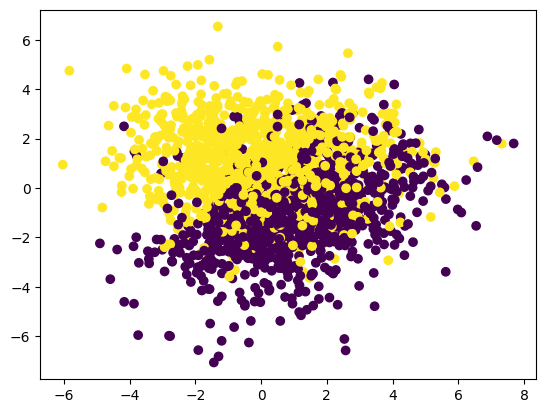

In [34]:
import matplotlib.pyplot as plt

_ = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42)
X_train.shape, X_test.shape

((1800, 10), (200, 10))

In [36]:
model = NN()
model.fit(X_train, y_train)

In [37]:
model.weights, model.bias

(array([-0.08918626,  0.11896716, -0.00139509,  0.02956403,  0.02887143,
         0.00559272,  0.03903519, -0.07252243, -0.05022879,  0.04071654]),
 -0.010000000000000004)

In [38]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

In [39]:
print(f"Train accuracy: {accuracy_train}")
print(f"Test accuracy: {accuracy_test}")

Train accuracy: 0.8861111111111111
Test accuracy: 0.84


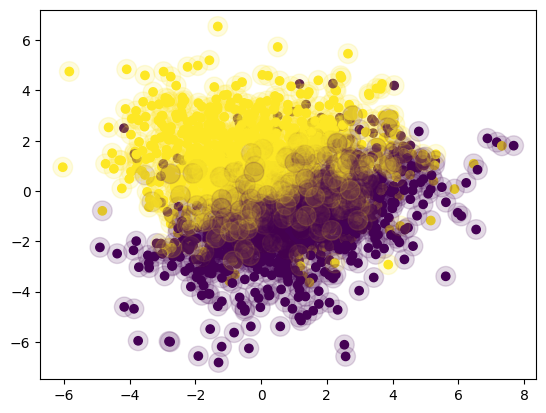

In [40]:
_ = plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, s=200, alpha=0.15)
plt.show()

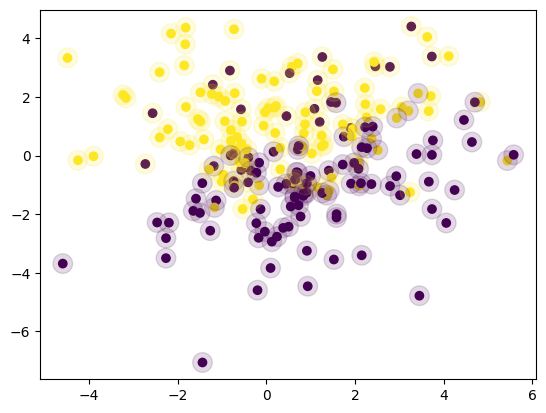

In [41]:
_ = plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, s=200, alpha=0.15)
plt.show()